In [22]:
from __future__ import print_function

import string
import random
import pickle
import sys
import os
import time

import numpy as np
# import theano
# import theano.tensor as T

sys.setrecursionlimit(10000)

import _pickle

def unpickle(file):
    fo = open(file, 'rb')
    dict = _pickle.load(fo,encoding='iso-8859-1')
    fo.close()
    return dict

def load_data():
    X = []
    Y = []
    for j in range(5):
        d = unpickle('cifar-10-batches-py/data_batch_'+str(j+1))
        xt = d['data']
        y_train1 = d['labels']
        X.append(xt)
        Y.append(y_train1)

        xt = np.concatenate(X)
        y_train1 = np.concatenate(Y).astype(np.int32)


        d = unpickle('cifar-10-batches-py/test_batch')
        x_test = d['data']
        y_test = np.array(d['labels'],dtype=np.int32)

        X_train = np.reshape(xt, (xt.shape[0], -1))
        X_test = np.reshape(x_test, (x_test.shape[0], -1))


        # add bias dimension and transform into columns
        X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
        X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    return X_train, y_train1, X_test, y_test

load_data()

In [23]:
load_data()

(array([[  59.,   43.,   50., ...,   84.,   72.,    1.],
        [ 154.,  126.,  105., ...,  142.,  144.,    1.],
        [ 255.,  253.,  253., ...,   83.,   84.,    1.],
        ..., 
        [  35.,   40.,   42., ...,   66.,   50.,    1.],
        [ 189.,  186.,  185., ...,  171.,  171.,    1.],
        [ 229.,  236.,  234., ...,  162.,  161.,    1.]]),
 array([6, 9, 9, ..., 9, 1, 1], dtype=int32),
 array([[ 158.,  159.,  165., ...,  129.,  110.,    1.],
        [ 235.,  231.,  232., ...,  191.,  199.,    1.],
        [ 158.,  158.,  139., ...,    3.,    7.,    1.],
        ..., 
        [  20.,   19.,   15., ...,   53.,   47.,    1.],
        [  25.,   15.,   23., ...,   81.,   80.,    1.],
        [  73.,   98.,   99., ...,   58.,   26.,    1.]]),
 array([3, 8, 8, ..., 5, 1, 7], dtype=int32))

In [6]:
load_data()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [ ]:
load_data()

In [ ]:
tar cif

FileNotFoundError: [Errno 2] No such file or directory: 'cifar-10-batches-py/data_batch_1'

In [9]:
X_train.shape

NameError: name 'X_train' is not defined

In [ ]:
# 

In [2]:
print(mnist.train.labels.shape,mnist.validation.labels.shape,mnist.test.labels.shape)

(55000, 10) (5000, 10) (10000, 10)


In [3]:
mnist.validation.labels[388,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [4]:
D = 784 # dimensionality
K = 10 # number of classes
X_train = np.zeros((55000,D))
y_train = np.zeros((55000,K), dtype=np.int)



In [5]:
# split data into 80-20
from sklearn import cross_validation

X_train, X_test, y_train, y_test = mnist.train.images, mnist.test.images, mnist.train.labels, mnist.test.labels
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)

X_test.shape
 

(10000, 784)

In [6]:
y_train1=np.zeros((55000,1),dtype='uint8')
y_test1=np.zeros((55000,1),dtype='uint8')

for j in range(55000):
    for i in range(9):
        if y_train[j,i]==1:
            y_train1[j]=i
for j in range(10000):
    for i in range(9):
        if y_test[j,i]==1:
            y_test1[j]=i

print(y_train1,y_test1)

[[7]
 [3]
 [4]
 ..., 
 [5]
 [6]
 [8]] [[7]
 [2]
 [1]
 ..., 
 [0]
 [0]
 [0]]


In [12]:
# Linear model

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#For simplicity, we will not optimize this using grid search here.b#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
# num_examples = X_train.shape[0]


#Initial value for the Gradient Descent Parameter
step_size = 1e-2 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.

Xtt=X_train[0:25000,:]
ytt=y_train1[0:25000,:]
num_examples = Xtt.shape[0]
# gradient descent loop
for i in range(100):
  
    # evaluate class scores, [N x K]
    scores = np.dot(Xtt, W) + b 
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = (exp_scores / np.sum(exp_scores, axis=1, keepdims=True))/1000 # [N x K]

  
#     # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),ytt])
#     corect_logprobs = -np.log(probs[np.random.randint(0,X_train.shape[0],num_examples),y_train1])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    
    if i % 10 == 0:
        print("iteration:",i, " loss:",loss)
       
  
#     # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),ytt] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(Xtt.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration: 0  loss: 230482.361781
iteration: 10  loss: 227888.61698
iteration: 20  loss: 227782.672184
iteration: 30  loss: 227774.316196
iteration: 40  loss: 227773.232493
iteration: 50  loss: 227772.986652
iteration: 60  loss: 227772.871859


KeyboardInterrupt: 

In [16]:
# Post-training: evaluate test set accuracy

#For simplicity, we will use training data as proxy for test. Do not do this.


scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print("test accuracy:",(np.mean(predicted_class == y_test1)))

test accuracy: 0.116707592727


In [14]:
scores = np.dot(Xtt, W) + b
predicted_class = np.argmax(scores, axis=1)
print("train accuracy:",(np.mean(predicted_class == ytt)))

train accuracy: 0.11037961


In [15]:
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print("train accuracy:",(np.mean(predicted_class == y_train1)))

train accuracy: 0.110422350083


(-1.9195589456423083, 1.9204410543576951)

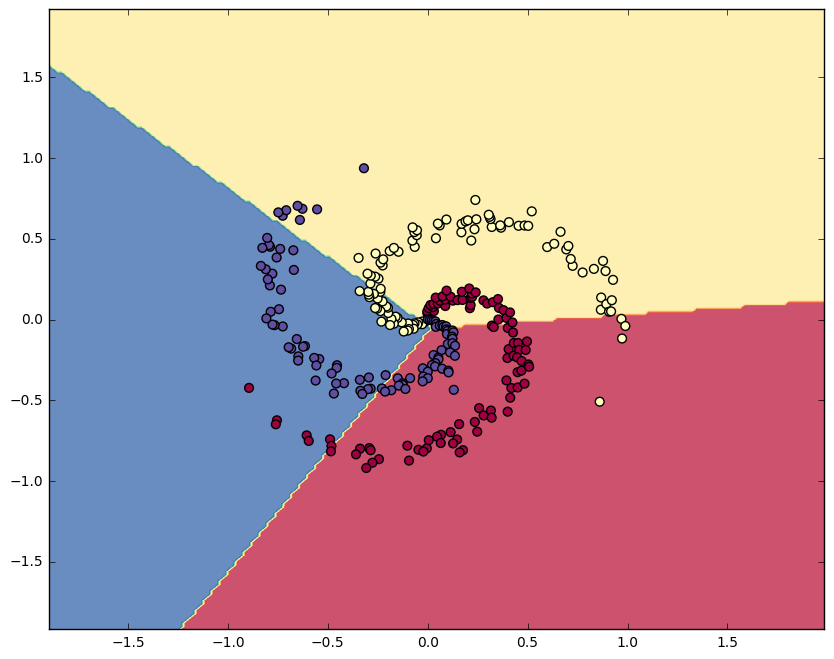

In [36]:
# Post training: plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')